## Question 2a

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define the goal point
goal = (25,10)

# define all other points
point_a = (random.randint(0,25), random.randint(0,25))
point_b = (random.randint(0,25), random.randint(0,25))
point_c = (random.randint(0,25), random.randint(0,25))
point_d = (random.randint(0,25), random.randint(0,25))
point_e = (random.randint(0,25), random.randint(0,25))

# create a list of all points
point_list = [point_a, point_b, point_c, point_d, point_e]

In [3]:
#function to find the distance between 2 points

def get_distance(point1, point2):
    if len(point1) != 2 or len(point2) != 2:
        return 'please provide x,y coordinates for each point'
    x_1 = point1[0]
    y_1 = point1[1]
    x_2 = point2[0]
    y_2 = point2[1]
    
    euclidean_distance = np.sqrt((x_1-x_2)**2 + (y_1-y_2)**2)
    return euclidean_distance

the closest point is :  (25, 5)


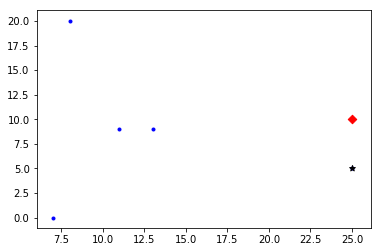

In [4]:
# find the closest point
distance = []
for point in point_list:
    distance.append(get_distance(goal, point))

smallest_distance_index = distance.index(min(distance))
closest_point = point_list[smallest_distance_index]
print('the closest point is : ', closest_point)
# plot out all of the points
for point in point_list:
    plt.scatter(point[0], point[1], marker = '.', c='b')
plt.scatter(closest_point[0], closest_point[1], marker='*', c='k')
plt.scatter(goal[0], goal[1],  marker='D', c='r')
plt.show()

## Quetion 2c

In [26]:
# first initialize the grid

grid_width = 750
grid_length = 500

border = []
for i in range(grid_length):
    border.append((0, i))
    border.append((750,i))
for i in range(grid_width):
    border.append((i, 0))
    border.append((i,500))



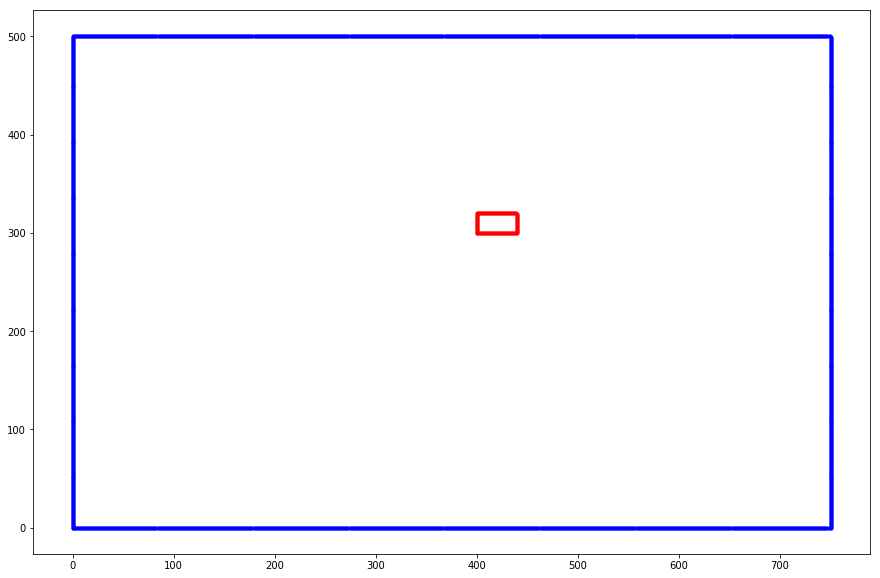

In [8]:
# initialize the obstacle

# want it to be a rectangle at position (400,300) of size (20, 40)

obstacle = []
inside_obstacle = []
obstacle1_length = 20
obstacle1_width = 40
obstacle1_x = 400
obstacle1_y = 300

for i in range(obstacle1_x,obstacle1_x+obstacle1_width):
    obstacle.append((i, obstacle1_y))
    obstacle.append((i, obstacle1_y+obstacle1_length))
for i in range(obstacle1_y, obstacle1_y+obstacle1_length):
    obstacle.append((obstacle1_x, i))
    obstacle.append((obstacle1_x+obstacle1_width, i))
for i in range(obstacle1_x,obstacle1_x+obstacle1_width):
    for j in range(obstacle1_y, obstacle1_y+obstacle1_length):
        inside_obstacle.append((i,j))
plt.figure(figsize=(15, 10))
for border_point in border:
    plt.scatter(border_point[0], border_point[1], c='b', marker = '.')
for obstacle_point in obstacle:
    plt.scatter(obstacle_point[0], obstacle_point[1], c='r', marker = '.')
plt.show()

In [14]:
# get all the valid points

valid_points = []
for i in range(grid_width):
    for j in range(grid_length):
        if (i,j) in inside_obstacle:
            pass
        valid_points.append((i,j))

In [19]:
print(valid_points[0:5])

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]


In [50]:
# using valid points and distance, assuming robot is a circle, find all points which are the radius away from the border

c_space_border_overlap = []
for point in valid_points:
    for obstacle_point in obstacle:
        if get_distance(point, obstacle_point) == 40:
            c_space_border_overlap.append(point)

In [57]:
max_x = max(c_space_border_overlap,key=lambda item:item[0])[0]
min_x = min(c_space_border_overlap,key=lambda item:item[0])[0]
max_y = max(c_space_border_overlap,key=lambda item:item[1])[1]
min_y = min(c_space_border_overlap,key=lambda item:item[1])[1]

In [59]:
c_space_border = []
for x in range(min_x, max_x):
    for y in range(min_y, max_y):
        c_space_border.append((x,y))

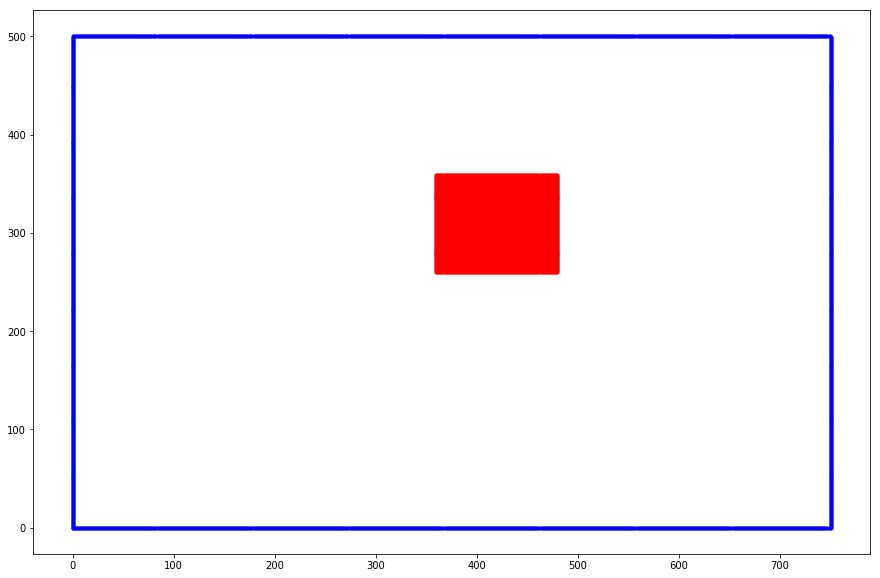

In [60]:
plt.figure(figsize=(15, 10))
for border_point in border:
    plt.scatter(border_point[0], border_point[1], c='b', marker = '.')
for obstacle_point in c_space_border:
    plt.scatter(obstacle_point[0], obstacle_point[1], c='r', marker = '.')
plt.show()